✅ Data loaded successfully!
Training data shape: (5620, 128, 128, 3)
Testing data shape: (1405, 128, 128, 3)
Number of classes: 16
Training data shape: (5620, 128, 128, 3)
Testing data shape: (1405, 128, 128, 3)


C:\Users\arunk\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.3213 - loss: 3.5083 - val_accuracy: 0.1146 - val_loss: 17.7143
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.4823 - loss: 1.7659 - val_accuracy: 0.1658 - val_loss: 13.2371
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 253ms/step - accuracy: 0.5303 - loss: 1.6765 - val_accuracy: 0.3181 - val_loss: 4.1613
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 258ms/step - accuracy: 0.5929 - loss: 1.3576 - val_accuracy: 0.6712 - val_loss: 1.1785
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.6195 - loss: 1.2686 - val_accuracy: 0.5772 - val_loss: 1.8131
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 46s 259ms/step - accuracy: 0.6703 - loss: 1.0421 - val_accuracy: 0.4199 - val_loss: 3.5076
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 268ms/step - accuracy: 0.6875 - loss: 0.9785 - val_accuracy: 0.5544 - val_loss: 1.7170
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.6893 - loss:

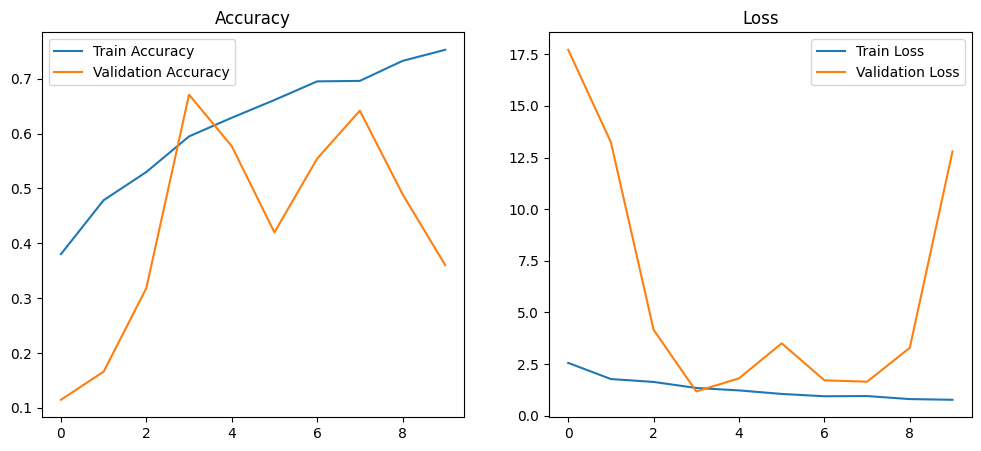

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.97      0.33      0.49       100
                     Pepper__bell___healthy       0.73      0.69      0.71       100
                      Potato___Early_blight       0.55      0.96      0.70       100
                           Potato___healthy       1.00      0.03      0.06        30
                       Potato___Late_blight       0.50      0.01      0.02       100
                      Tomato_Bacterial_spot       0.94      0.17      0.29       100
                        Tomato_Early_blight       0.45      0.29      0.35       100
                             Tomato_healthy       0.13      1.00      0.23       100
                         Tomato_Late_blight       0.35      0.17      0.23       100
                           Tomato_Leaf_Mold       0.78      0.59      0.67       100


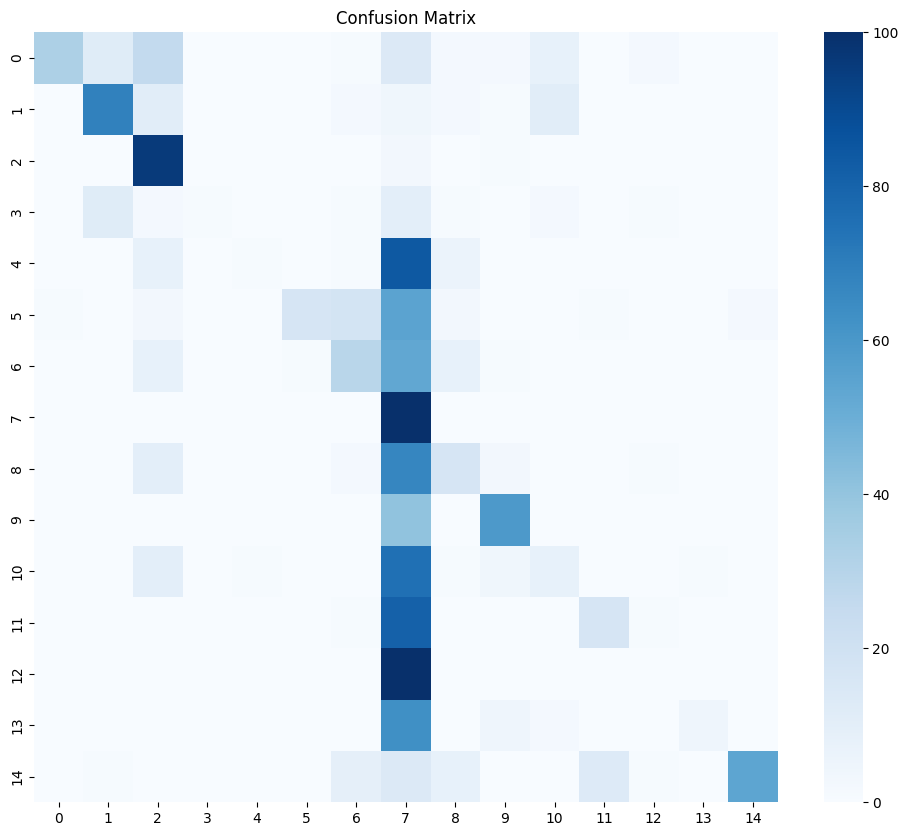

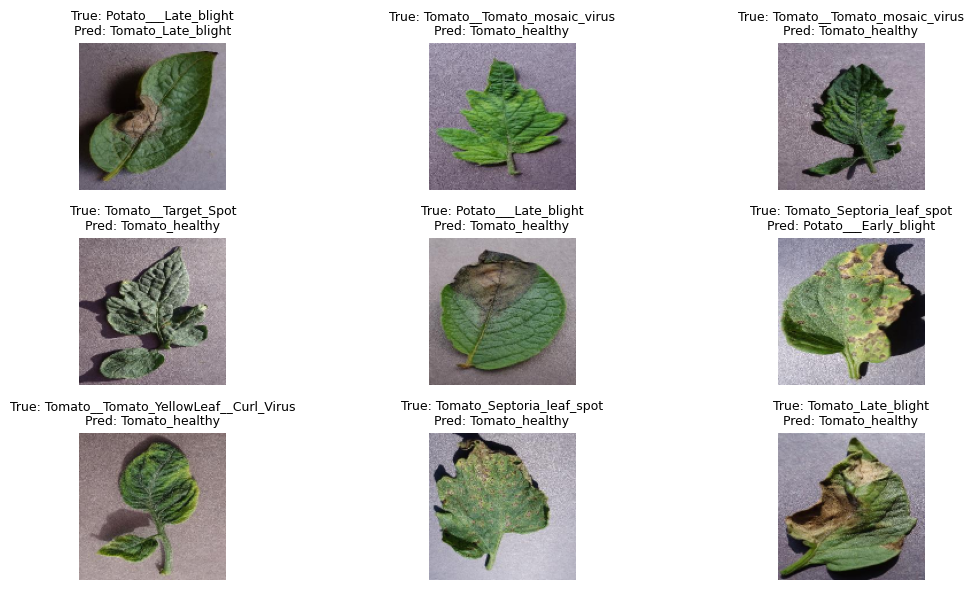

In [14]:
# Week 2 - Model Development & Training
# AICTE Cycle 3 (2025) - Sustainable Agriculture Project
# 📌 Load processed data from Week 1
import pickle

with open("processed_data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test, categories = pickle.load(f)

print("✅ Data loaded successfully!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Number of classes:", len(categories))

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load preprocessed data (from Week 1 notebook)
# X_train, X_test, y_train, y_test must already be available
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Convert labels to categorical (one-hot encoding)
num_classes = len(categories)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title("Loss")
plt.show()

# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Unique labels actually present in y_test
labels = np.unique(y_test)

# Match labels to category names
target_names = [categories[i] for i in labels]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, labels=labels, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#Misclassified examples (to showcase in report):
# Create mapping from numeric labels to category names
label_to_name = {label: categories[label] for label in labels}

# Misclassified examples
misclassified_idx = np.where(y_test != y_pred_classes)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:9]):  # first 9 misclassified
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    
    true_label = label_to_name[y_test[idx]]
    pred_label = label_to_name[y_pred_classes[idx]]
    
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()




In [15]:
# Save trained model
model.save("crop_disease_model.h5")
print("✅ Model saved as crop_disease_model.h5")

# Save training history
import pickle
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)
print("✅ Training history saved")


✅ Model saved as crop_disease_model.h5
✅ Training history saved
